In [1]:
import xarray as xr
import numpy as np
from datetime import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
%matplotlib inline
import pandas as pd
from mpl_toolkits.basemap import Basemap

In [2]:
filename = '/home/duarte/Documentos/mestrado-INPE/aulas/termodinamica/lista_3/total_precipitation.nc'
prec = xr.open_dataset(filename)

In [3]:
prec

<xarray.Dataset> Size: 12GB
Dimensions:    (longitude: 1440, latitude: 721, time: 2880)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 23kB 2015-01-01 ... 2015-04-30T23:00:00
Data variables:
    tp         (time, latitude, longitude) float32 12GB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-03 03:18:03 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [9]:
# Extraia as coordenadas de latitude e longitude e converta para float32
lat = prec['latitude'].values
lon = prec['longitude'].values

In [13]:
tp = prec.tp[1,:,:]

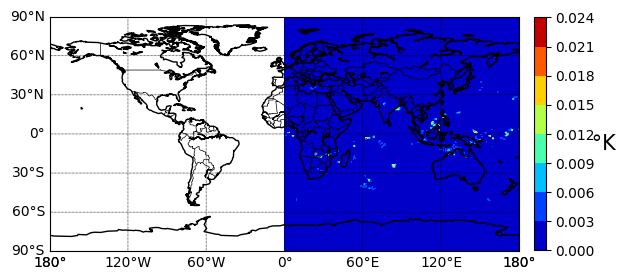

In [17]:
# Cria uma instância do mapa
m = Basemap(projection='cyl', resolution='c')

# Desenha as características do mapa
m.drawcoastlines()
m.drawcountries()

# Desenha paralelos e meridianos
parallels = np.arange(-90., 91., 30.)
m.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
meridians = np.arange(-180., 181., 60.)
m.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)

cf = plt.contourf(lon, lat, tcc, cmap='jet')
cb = plt.colorbar(cf, fraction=0.0235, pad=0.03)
cb.set_label(' \u00b0K', fontsize=15, rotation=0)
plt.show()

